# Analyze model shaps

**Motivation**: This script analyzes model fSHAPs for each feature using the file `df_shap_test`. It generates a table used in the PDF.

### loads

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from typing import Union
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import os

# local
import set_path
import supp.support_load as sl
from supp.support_model_glm import get_model_coef_df, get_model_coef_dict

In [2]:
df_shap = sl.read_csv('df_shap_test')
df_shap = df_shap.set_index('title')
print(f'{df_shap.shape}\tshape of df_shap')
df_shap.head()

CSV file loaded.
C:\Users\Stoja\OneDrive\Documents\diplomka\scr\data\df_shap_test.csv
(44, 12)	shape of df_shap


,step_glm_v1,step_nn_v1,lasso_glm_v1,lasso_nn_v1,ridge_glm_v1,ridge_nn_v1,step_glm_v2,step_nn_v2,lasso_glm_v2,lasso_nn_v2,ridge_glm_v2,ridge_nn_v2
title,,,,,,,,,,,,
imy-rA zS(w) a(w) (nw) ncwt,0.413767,0.685519,0.253458,0.476714,0.089920,0.252059,NaN,NaN,NaN,NaN,NaN,NaN
wr 5 (m) pr 9Hwty,0.245729,0.063920,0.150357,0.147962,0.140160,0.030327,0.200925,0.099504,0.091056,0.071585,0.120043,0.038612
HAty-a,0.186256,0.582779,0.173626,0.482289,0.080700,0.257214,0.201412,0.456007,0.215682,0.427763,0.078327,0.256973
zA ncwt n Xt.f,0.232232,0.220129,0.075522,0.199102,0.085624,0.092005,0.165683,0.116631,0.070390,0.108015,0.081665,0.089982
iry-pat,0.169194,0.313439,0.169160,0.230364,0.094421,0.289784,0.179334,0.390614,0.164968,0.337415,0.087906,0.354578


### function

In [3]:
model_list = ['step_glm_v1',
              'step_nn_v1',
              'lasso_glm_v1',
              'lasso_nn_v1',
              'ridge_glm_v1',
              'ridge_nn_v1',
              'step_glm_v2',
              #'step_nn_v2',    # ommit step_nn_v2... is too bad
              'lasso_glm_v2',
              'lasso_nn_v2',
              'ridge_glm_v2',
              'ridge_nn_v2'
             ]

In [4]:
def get_df_rank(df):
    # create ranked dataset
    df_rank = df.loc[:, model_list]
    df_rank = df_rank.rank(ascending=False, method='min', numeric_only=True)
    df_rank['mean'] = df_rank.mean(axis=1).round(2)
    df_rank['std'] = df_rank.std(axis=1).round(2)
    column_order = ['mean', 'std'] + model_list
    return df_rank[column_order]

### analyze

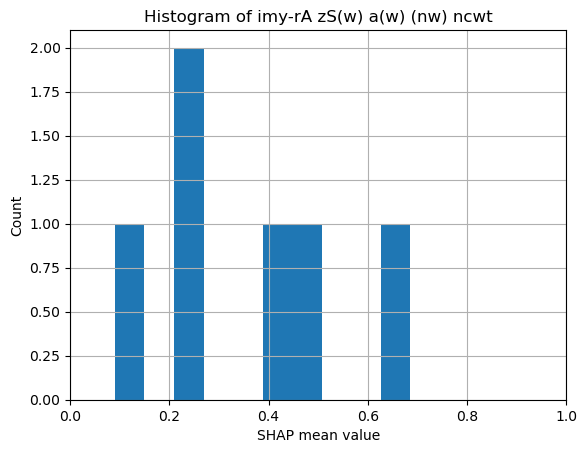

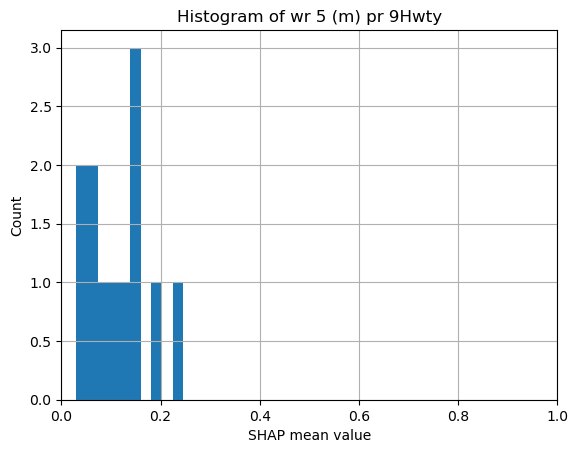

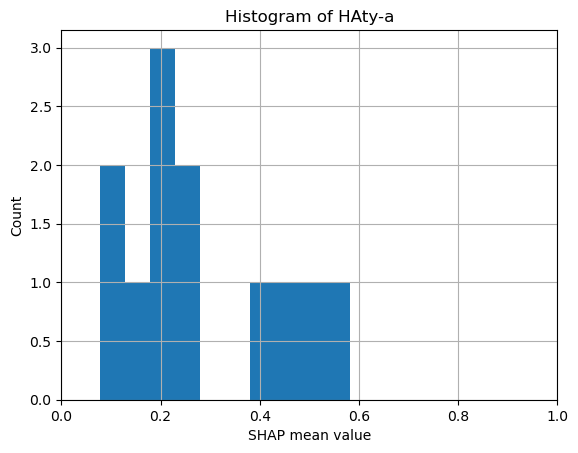

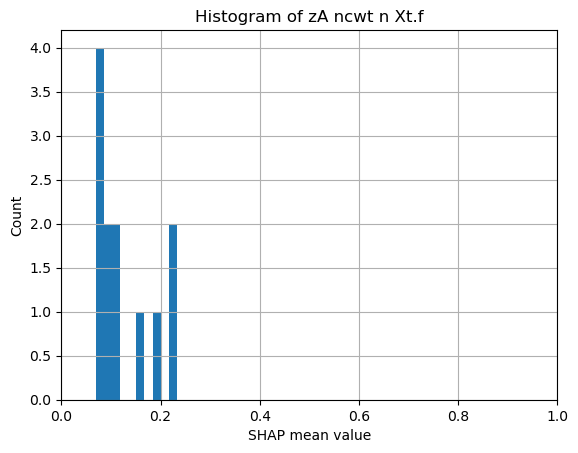

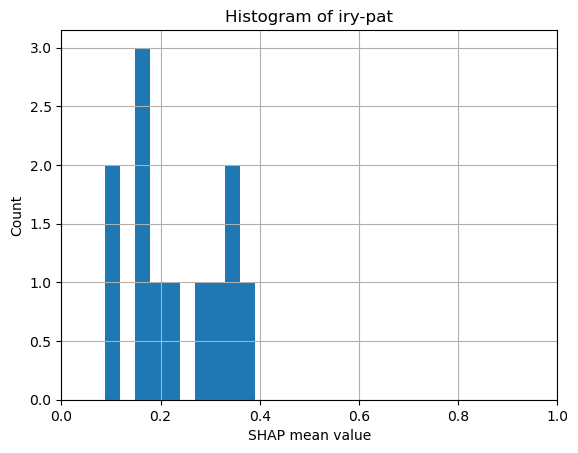

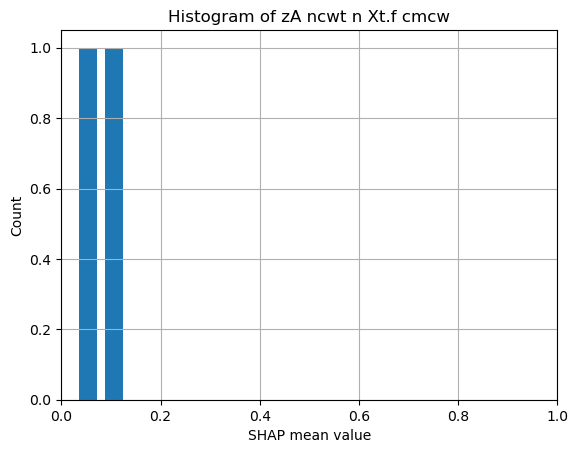

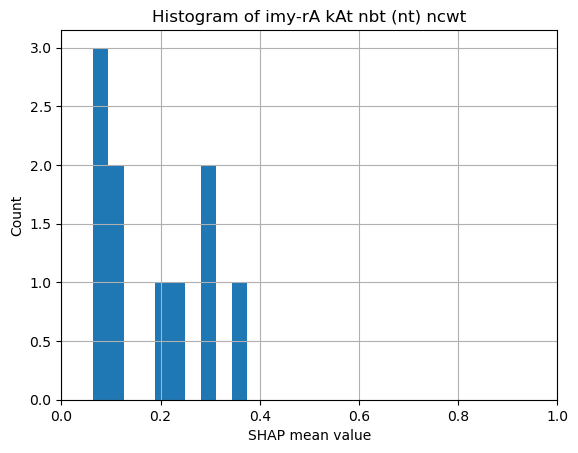

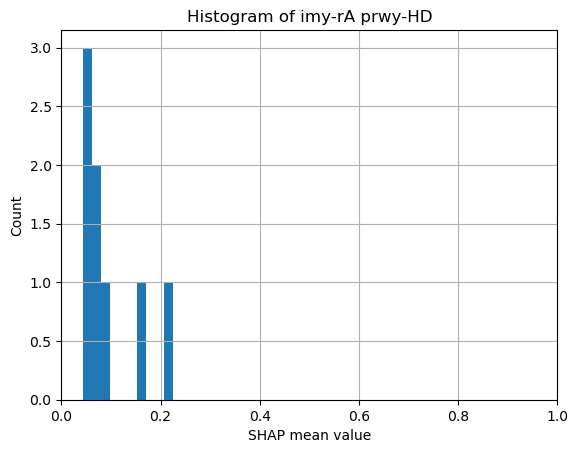

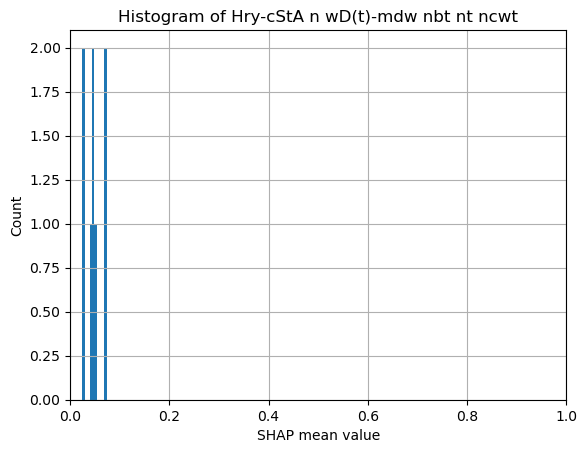

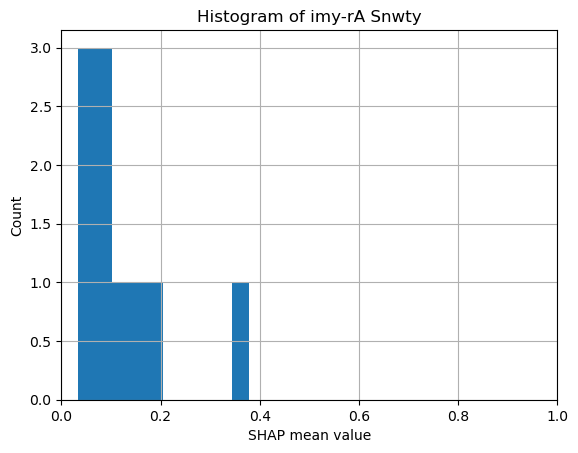

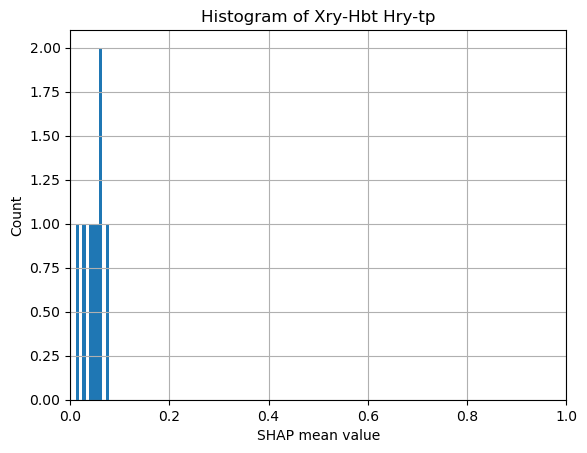

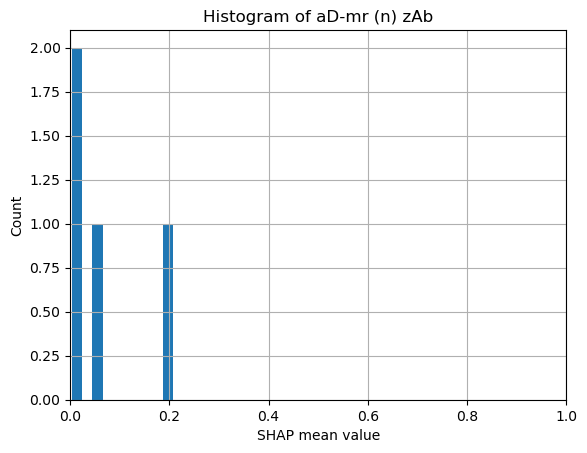

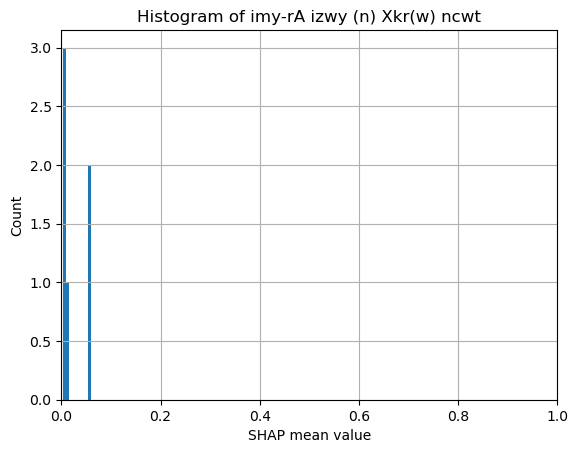

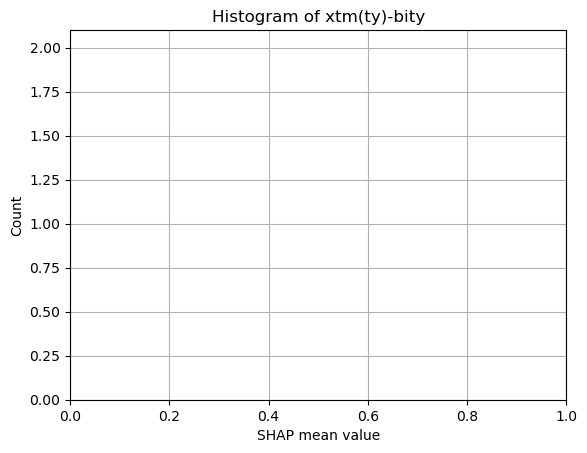

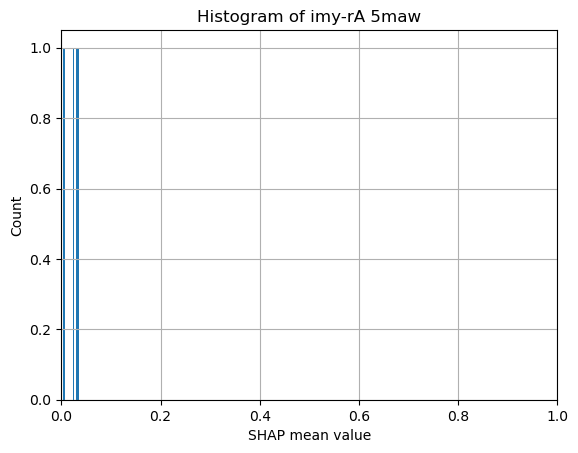

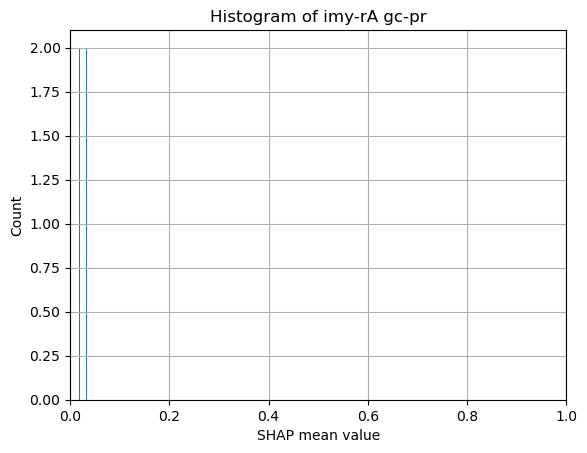

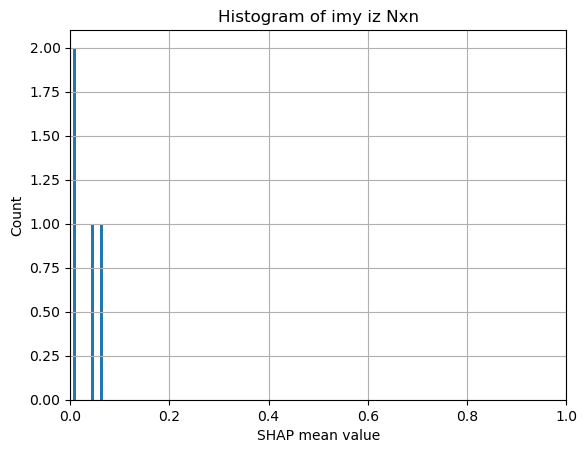

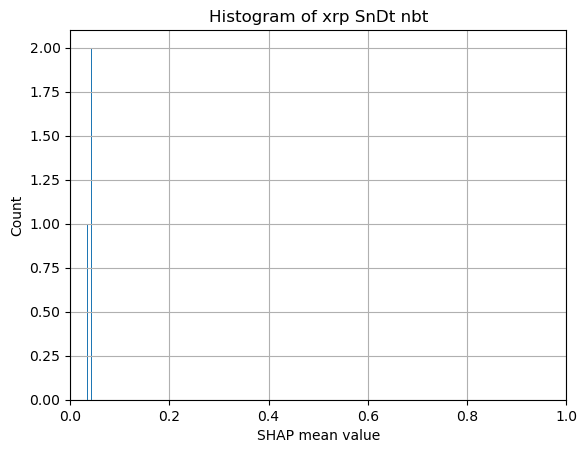

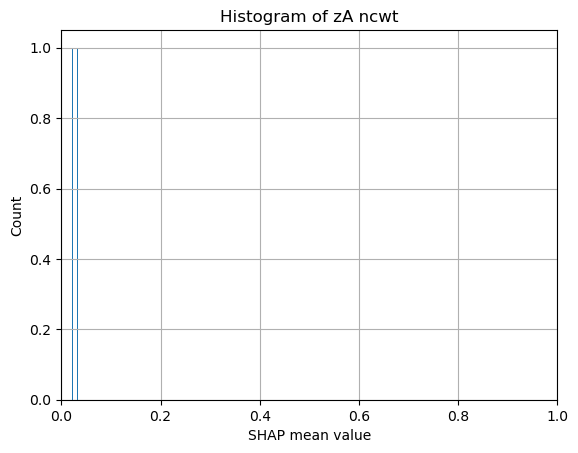

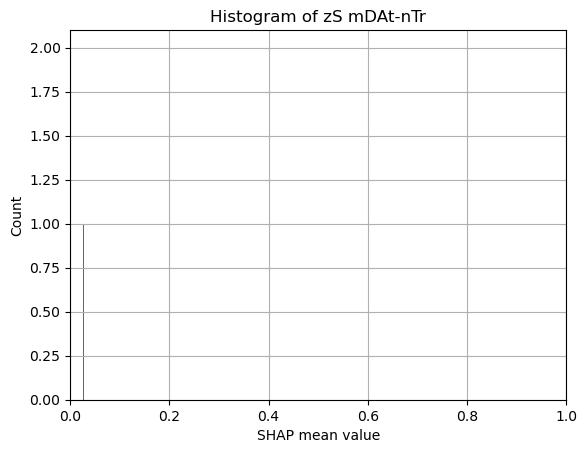

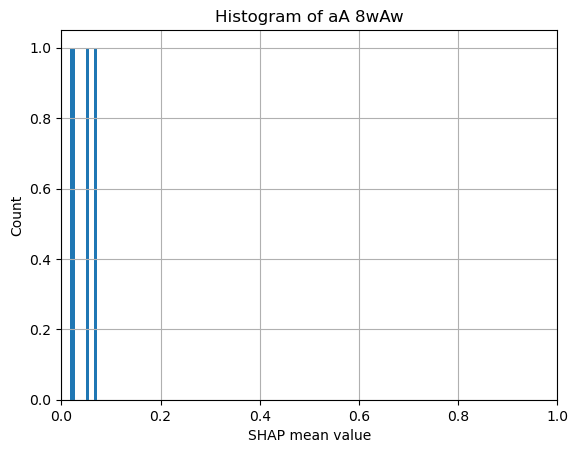

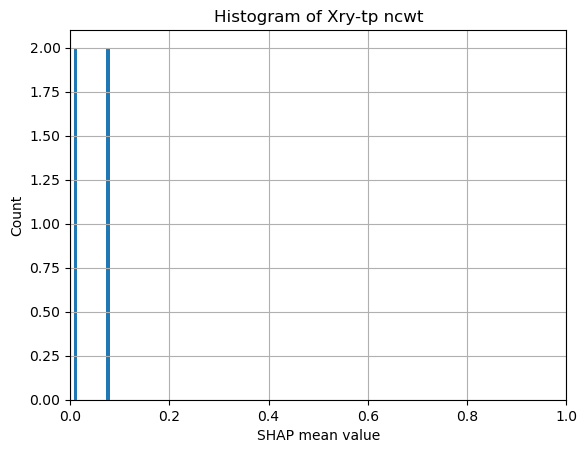

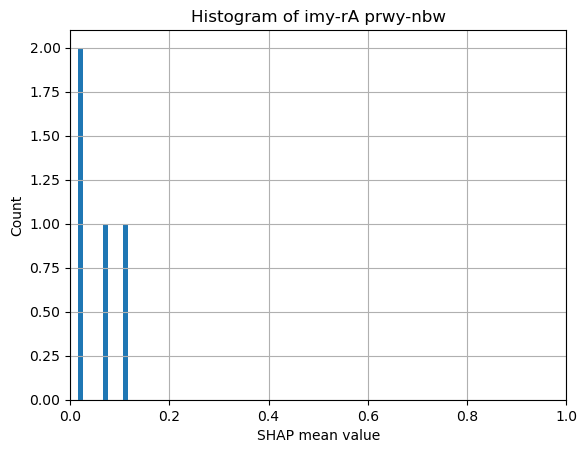

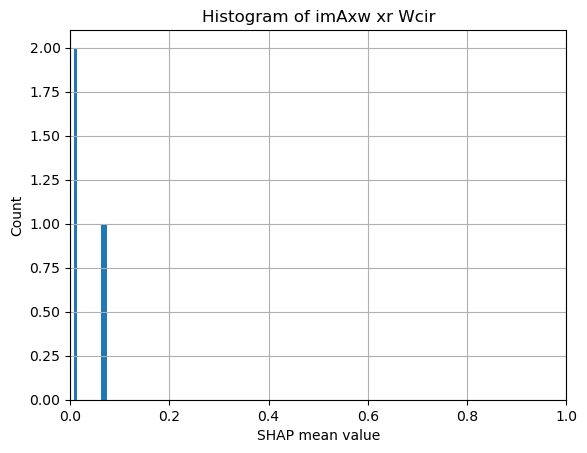

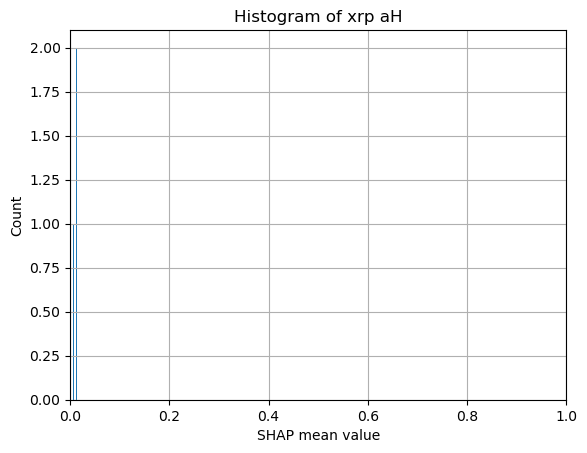

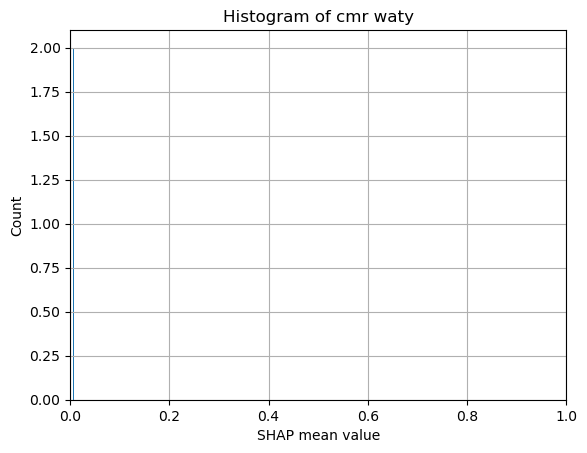

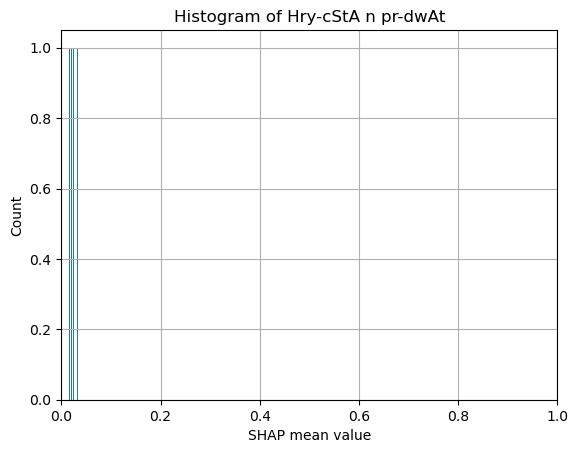

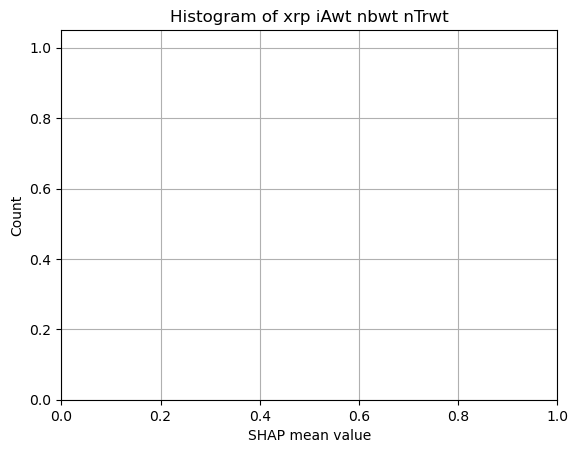

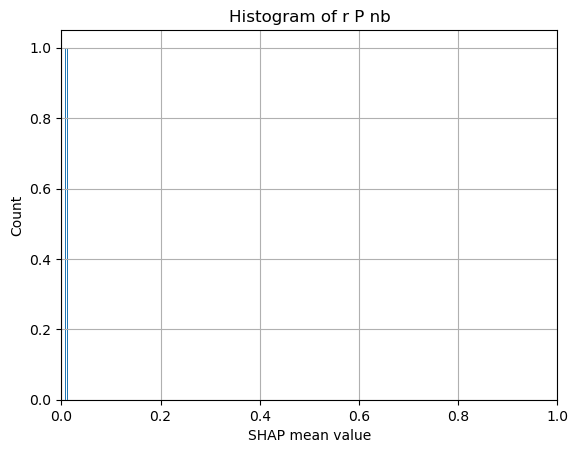

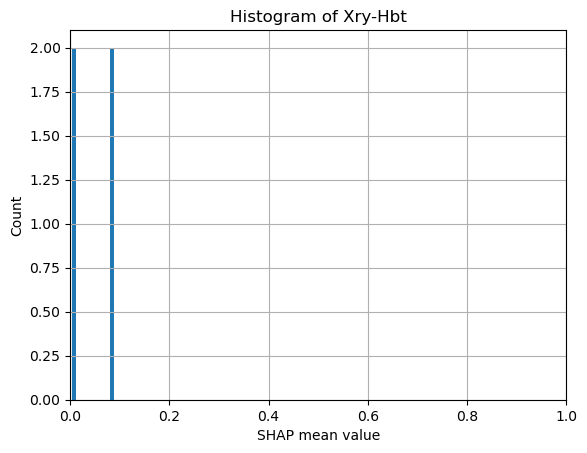

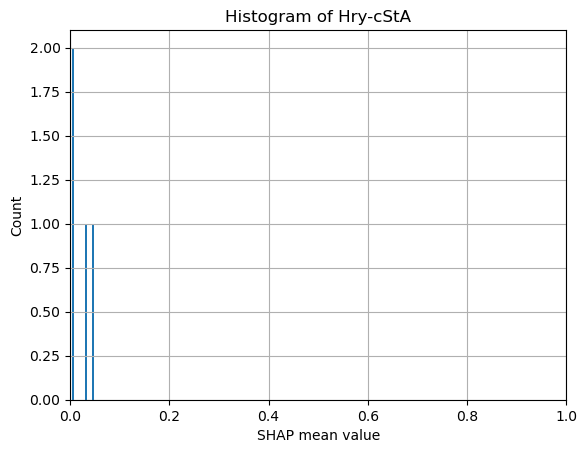

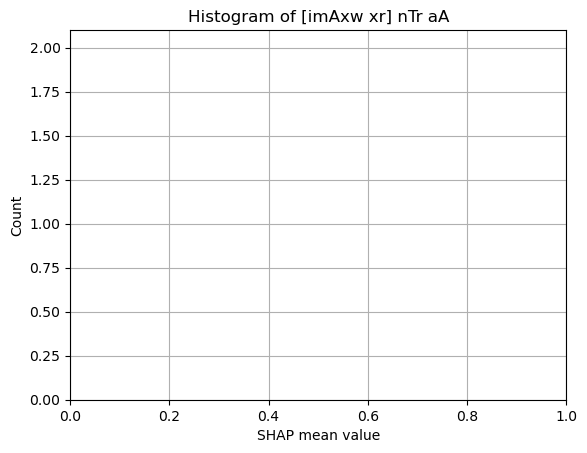

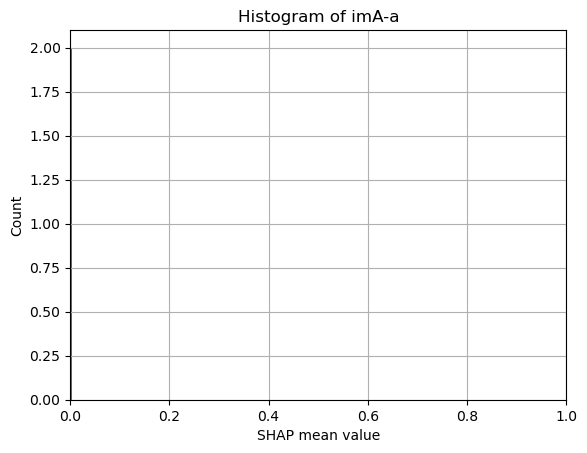

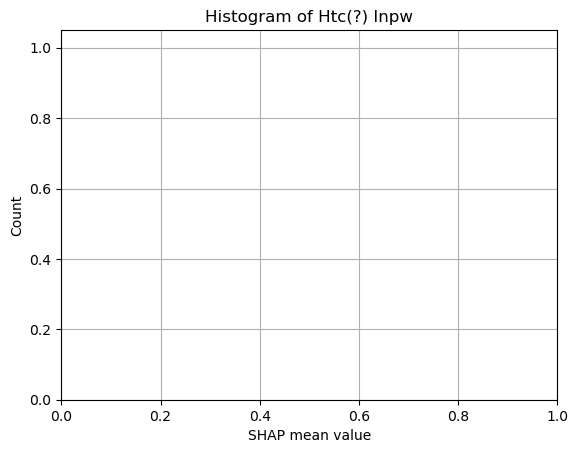

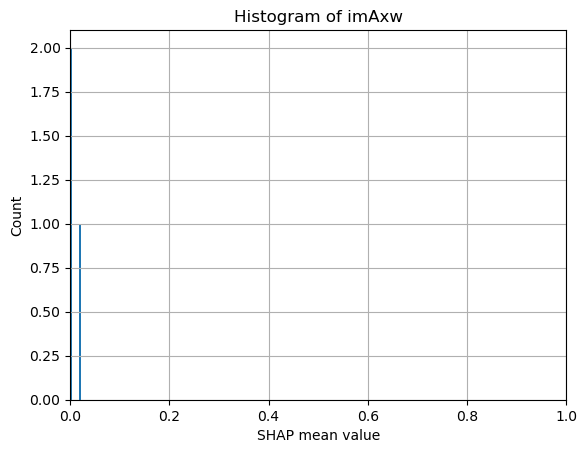

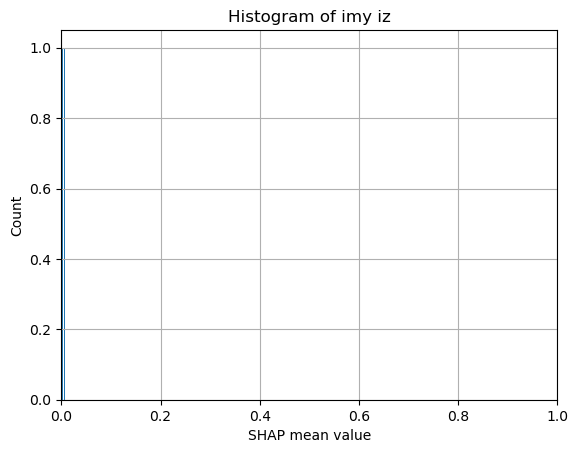

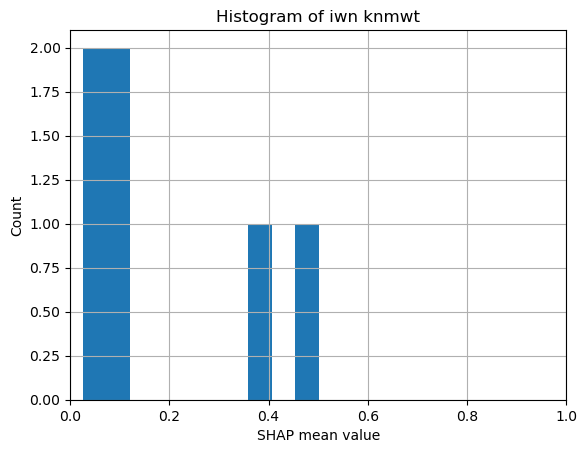

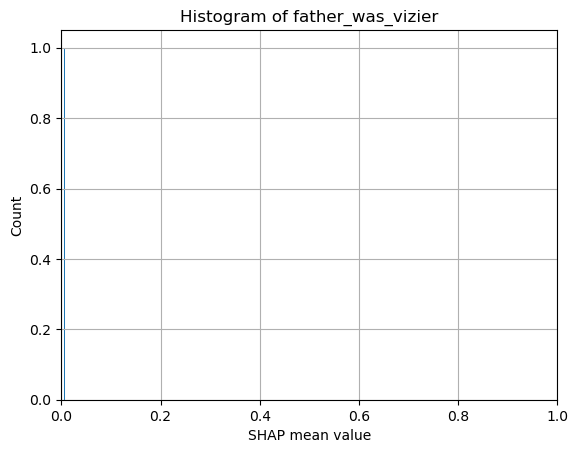

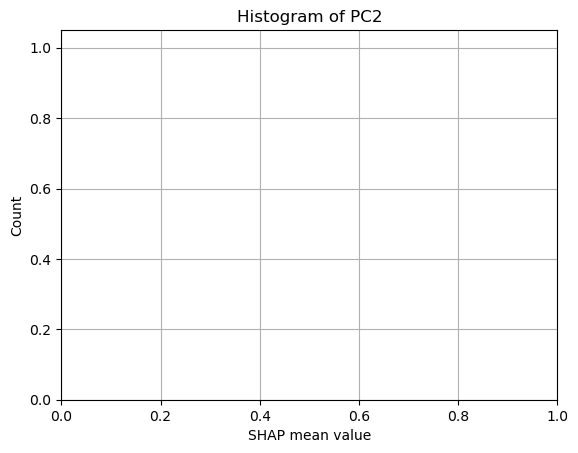

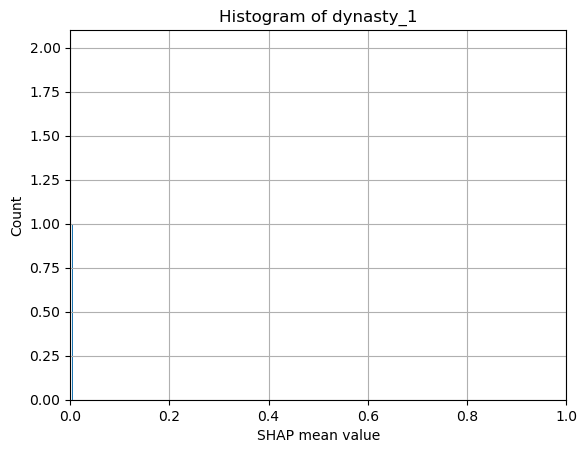

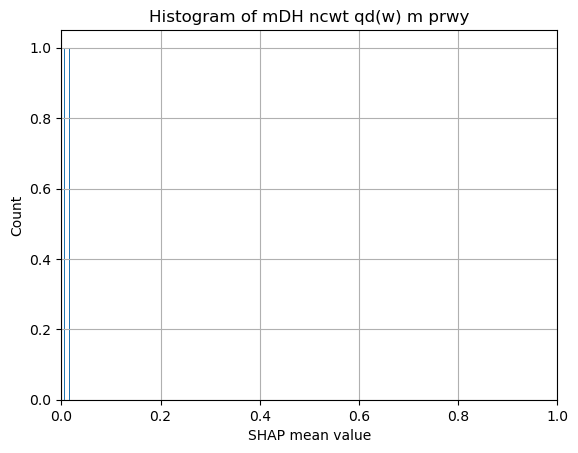

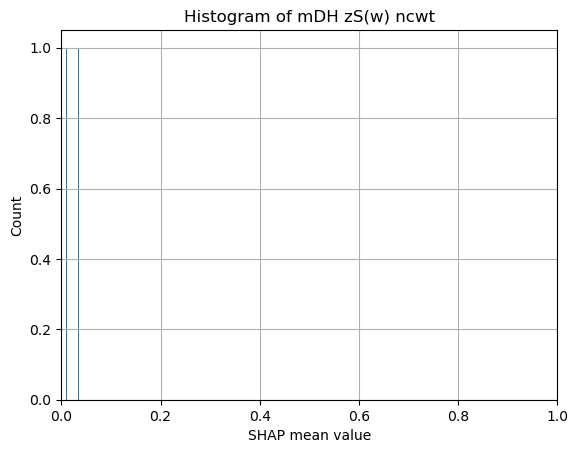

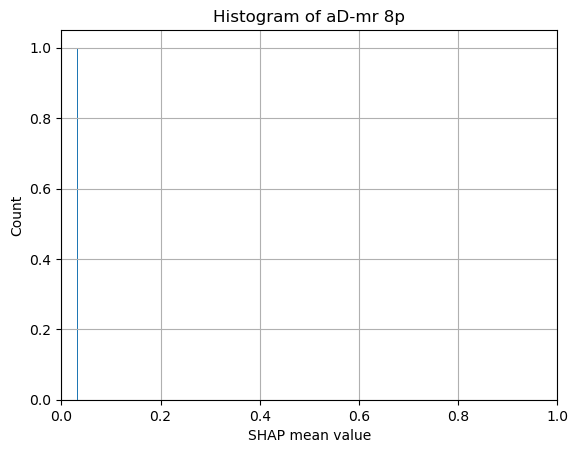

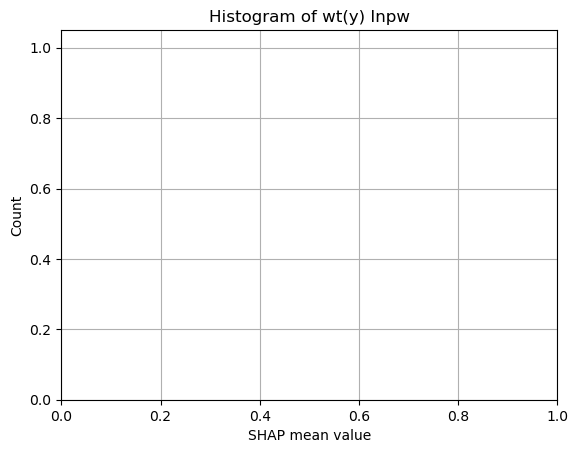

In [5]:
for feature in df_shap.index:
    plt.figure()
    s = df_shap.loc[feature, :]
    s.hist()
    plt.title(f'Histogram of {feature}')
    plt.xlabel('SHAP mean value')
    plt.ylabel('Count')
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()

In [6]:
df_rank = get_df_rank(df_shap)
df_rank

,mean,std,step_glm_v1,step_nn_v1,lasso_glm_v1,lasso_nn_v1,ridge_glm_v1,ridge_nn_v1,step_glm_v2,lasso_glm_v2,lasso_nn_v2,ridge_glm_v2,ridge_nn_v2
title,,,,,,,,,,,,,
imy-rA zS(w) a(w) (nw) ncwt,2.00,1.15,1.0,1.0,1.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN
wr 5 (m) pr 9Hwty,6.64,6.17,2.0,5.0,4.0,7.0,1.0,21.0,2.0,5.0,9.0,1.0,16.0
HAty-a,2.45,1.67,4.0,2.0,2.0,1.0,6.0,2.0,1.0,1.0,1.0,5.0,2.0
zA ncwt n Xt.f,5.55,1.44,3.0,4.0,6.0,6.0,5.0,6.0,5.0,7.0,7.0,4.0,8.0
iry-pat,2.91,1.16,5.0,3.0,3.0,4.0,3.0,1.0,4.0,2.0,3.0,3.0,1.0
zA ncwt n Xt.f cmcw,8.50,5.83,NaN,NaN,5.0,12.0,2.0,19.0,NaN,4.0,10.0,2.0,14.0
imy-rA kAt nbt (nt) ncwt,4.78,1.62,NaN,NaN,7.0,3.0,7.0,4.0,6.0,3.0,4.0,6.0,3.0
imy-rA prwy-HD,7.38,2.50,NaN,NaN,9.0,11.0,9.0,5.0,NaN,6.0,5.0,10.0,4.0
Hry-cStA n wD(t)-mdw nbt nt ncwt,12.88,4.83,NaN,NaN,8.0,10.0,14.0,22.0,NaN,10.0,8.0,19.0,12.0


### plots

In [7]:
folder_name = r'img/rank_plot_title'

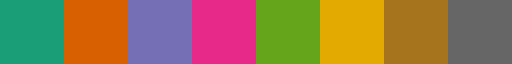

In [8]:
plt.colormaps['Dark2']

In [9]:
def plot_rank(df, figsize=None):
    # Set colors for dots and std lines
    cmap = plt.colormaps['Dark2']
    DOT_COLOR = cmap(2)
    STD_LINE_COLOR = cmap(7)
    
    # Create the plot
    if figsize is None:
        figsize = (8, 0.3*len(df))
    fig, ax = plt.subplots(figsize=figsize)
    
    for idx, row in df.iterrows():
        mean = row['mean']
        std = row['std']
        label = row['title']
        y = idx
    
        # Plot horizontal line from mean-std to mean+std
        ax.hlines(y, mean - std, mean + std, color=STD_LINE_COLOR, linewidth=2)
    
        # Plot the mean as a marker
        ax.plot(mean, y, 'o', color=DOT_COLOR, markersize=8)
    
        # Add text annotation of mean value
        ax.text(mean + std + 0.5, y, f"{mean:.1f} ± {std:.1f}", va='center', fontsize=11, color=STD_LINE_COLOR)
    
    # Add horizontal reference lines
    for i in range(len(df)):
        ax.axhline(i, color='lightgray', linestyle='--', linewidth=0.7, alpha=0.6)
    
    # Add legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=f'Rank Mean', markerfacecolor=DOT_COLOR, markersize=8),
        Line2D([0], [0], linestyle='-', linewidth=3, label=f'Mean ± STD', color=STD_LINE_COLOR)
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=11, title_fontsize=12)
    
    # Set labels and title
    ax.set_xlabel('Average Rank', fontsize=12)
    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df['title'], fontsize=12)
    ax.set_ylabel('Title Name', fontsize=12)
    ax.set_title(f'Feature Rank', fontsize=14)
    ax.invert_yaxis()
    ax.xaxis.grid(True, linestyle='--', alpha=0.5)
    ax.set_facecolor('#f5f5f5')  # background
    fig.patch.set_facecolor('White')
    
    # Adjust x-axis limit to fit text
    max_x = (df['mean'] + df['std']).max()
    max_x_offset = ax.get_xticks().max() / 7
    ax.set_xlim(left=None, right=max_x + max_x_offset)
    # Adjust y-axis limit
    ax.set_ylim(top=-0.5, bottom=len(df) - 0.5)

    # Save plot
    file_name = 'ranked_titles'
    path = os.path.join(folder_name, file_name)
    plt.savefig(path + '.pdf', bbox_inches="tight")
    plt.savefig(path + '.png', dpi=600)
    
    plt.tight_layout()
    plt.show()

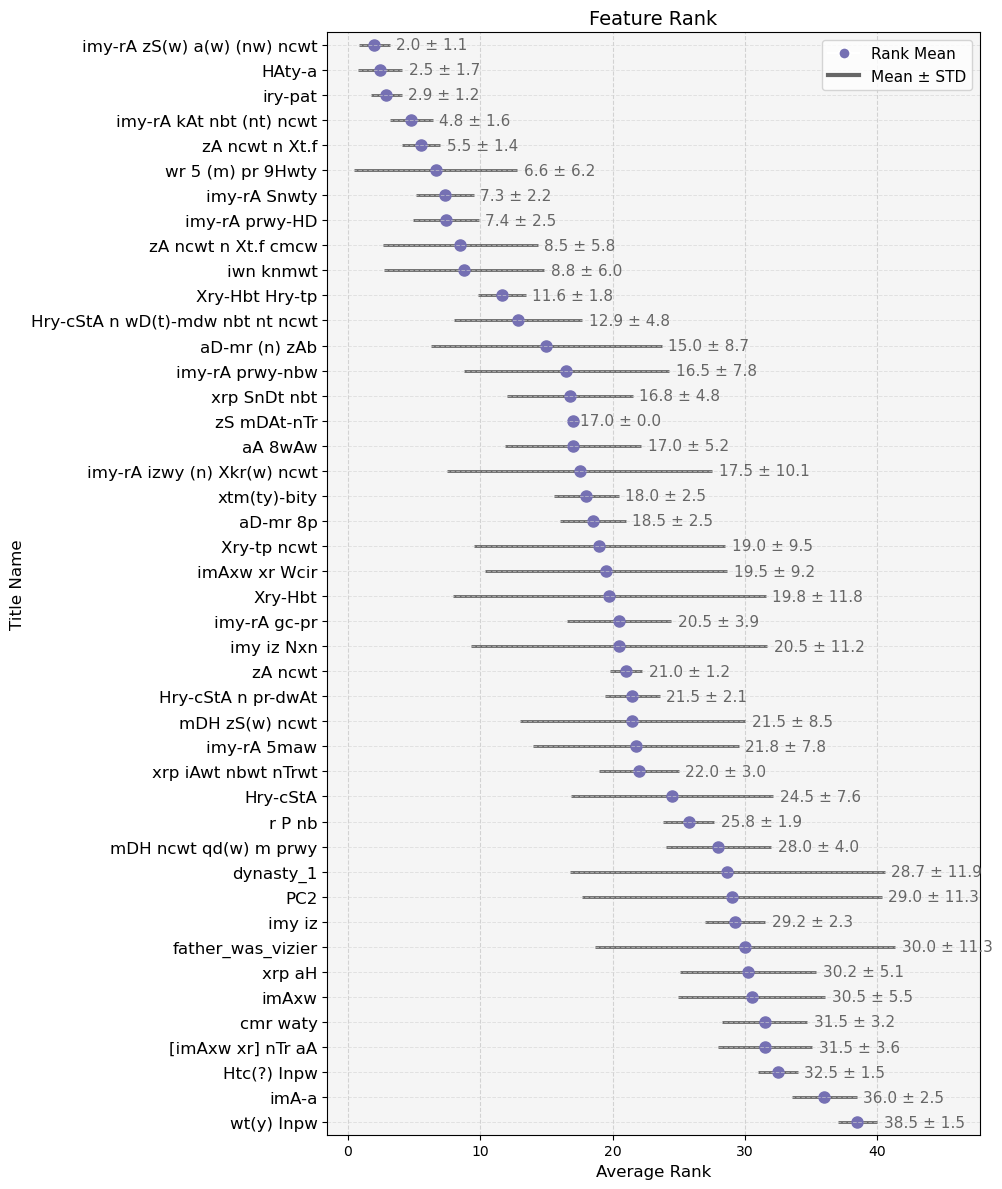

In [10]:
rank_all = df_rank.copy()
rank_all = rank_all.reset_index()
rank_all = rank_all.sort_values(['mean', 'std', 'title'])
rank_all = rank_all.reset_index()
plot_rank(rank_all, figsize=(10,12))